In [2]:
import pandas as pd
import os
import pickle
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
input = {'Time': ['01/08/2023 10:00'], 'BS': ['B_0'], 'load': [0.59], 'ESMode1': [0], 'ESMode2': [0], 'ESMode6': [0]}

In [4]:
df = pd.DataFrame(input)
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')

date_range = pd.date_range(start=df['Time'][0], periods=48, freq='H')
df_extended = pd.DataFrame(date_range, columns=['Time'])
for column in df.columns[1:]:
    df_extended[column] = df[column][0]

df_extended

,Time,BS,load,ESMode1,ESMode2,ESMode6
0,2023-01-08 10:00:00,B_0,0.59,0,0,0
1,2023-01-08 11:00:00,B_0,0.59,0,0,0
2,2023-01-08 12:00:00,B_0,0.59,0,0,0
3,2023-01-08 13:00:00,B_0,0.59,0,0,0
4,2023-01-08 14:00:00,B_0,0.59,0,0,0
5,2023-01-08 15:00:00,B_0,0.59,0,0,0
6,2023-01-08 16:00:00,B_0,0.59,0,0,0
7,2023-01-08 17:00:00,B_0,0.59,0,0,0
8,2023-01-08 18:00:00,B_0,0.59,0,0,0
9,2023-01-08 19:00:00,B_0,0.59,0,0,0


In [20]:
df_load = pd.read_csv(r'../Dataset/CLdata.csv')
df_load = df_load[['Time', 'load']]
df_load['Time'] = pd.to_datetime(df_load['Time'], format='%m/%d/%Y %H:%M')
df_load = df_load.set_index('Time')
df_load = df_load.resample('H').mean()
df_load = df_load.rename(columns={'load': 'y'})
df_load = df_load.reset_index().rename(columns={'Time': 'ds'})
df_load

,ds,y
0,2023-01-01 01:00:00,0.209495
1,2023-01-01 02:00:00,0.144214
2,2023-01-01 03:00:00,0.103428
3,2023-01-01 04:00:00,0.078831
4,2023-01-01 05:00:00,0.069253
...,...,...
163,2023-01-07 20:00:00,0.391054
164,2023-01-07 21:00:00,0.294653
165,2023-01-07 22:00:00,0.337560
166,2023-01-07 23:00:00,0.344815


In [21]:
# train a prophet model to predict the load
m = Prophet()
m.fit(df_load)
future = m.make_future_dataframe(periods=48, freq='H')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

general_model_filename = os.path.join(save_dir, 'general_model.pkl')
with open(general_model_filename, 'wb') as f:
    pickle.dump(general_model, f)

15:31:16 - cmdstanpy - INFO - Chain [1] start processing
15:31:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
211,2023-01-09 20:00:00,0.346136,0.311557,0.380593
212,2023-01-09 21:00:00,0.340567,0.305497,0.377062
213,2023-01-09 22:00:00,0.334401,0.295804,0.368871
214,2023-01-09 23:00:00,0.320592,0.282660,0.356282
215,2023-01-10 00:00:00,0.290132,0.254441,0.325980


In [5]:
df_load = df_extended[['Time', 'load']]
df_load

,Time,load
0,2023-01-08 10:00:00,0.59
1,2023-01-08 11:00:00,0.59
2,2023-01-08 12:00:00,0.59
3,2023-01-08 13:00:00,0.59
4,2023-01-08 14:00:00,0.59
5,2023-01-08 15:00:00,0.59
6,2023-01-08 16:00:00,0.59
7,2023-01-08 17:00:00,0.59
8,2023-01-08 18:00:00,0.59
9,2023-01-08 19:00:00,0.59


In [14]:
# Load the general model
bs=input['BS'][0]
save_dir = 'saved_models'

model_filename = os.path.join(save_dir, f'model_{bs}.pkl')
        
if os.path.exists(model_filename):
    with open(model_filename, "rb") as f:
        loaded_model = pickle.load(f)
        print('Specific model used.')
else:
    # Use the general model if the specific model is not available
    general_model_filename = os.path.join(save_dir, 'general_model.pkl')
    with open(general_model_filename, 'rb') as f:
        general_model = pickle.load(f)

    print(bs)
    print(f'model_{bs}.pkl')
    loaded_model = general_model
    print('General model used.')

# Create the 'future' DataFrame for prediction
future = pd.DataFrame({'ds': df_extended['Time']})

# Add columns to the 'future' DataFrame
future['load'] = df_extended['load']
future['ESMode1'] = df_extended['ESMode1']
future['ESMode2'] = df_extended['ESMode2']
future['ESMode6'] = df_extended['ESMode6']

# Use the loaded model to predict values for the new data
forecast = loaded_model.predict(future)

forecast

Specific model used.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,ESMode1,ESMode1_lower,ESMode1_upper,ESMode2,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,load,load_lower,load_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-08 10:00:00,71.322809,66.741315,78.217245,71.322809,71.322809,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,71.956992
1,2023-01-08 11:00:00,71.315926,65.641502,76.725128,71.315926,71.315926,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,71.093744
2,2023-01-08 12:00:00,71.309042,64.697606,76.320641,71.309042,71.309042,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,70.410007
3,2023-01-08 13:00:00,71.302158,64.515801,76.085574,71.302158,71.302158,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,70.355090
4,2023-01-08 14:00:00,71.295274,66.041383,77.010951,71.295274,71.295274,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,71.391683
5,2023-01-08 15:00:00,71.288390,68.276145,78.779711,71.288390,71.288390,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,73.577769
6,2023-01-08 16:00:00,71.281507,70.480992,81.639824,71.281506,71.281507,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,76.276778
7,2023-01-08 17:00:00,71.274623,72.797395,83.873015,71.274623,71.274623,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,78.414770
8,2023-01-08 18:00:00,71.267739,73.125757,84.677433,71.267739,71.267739,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,79.186472
9,2023-01-08 19:00:00,71.260855,72.362996,84.157460,71.260855,71.260855,0.0,0.0,0.0,0.0,...,0.494692,0.494692,0.494692,0.494692,0.494692,0.494692,0.0,0.0,0.0,78.611635


In [15]:
df_extended[['Energy', 'Energy_low', 'Energy_high']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
df_extended

,Time,BS,load,ESMode1,ESMode2,ESMode6,Energy,Energy_low,Energy_high
0,2023-01-08 10:00:00,B_0,0.59,0,0,0,71.956992,66.741315,78.217245
1,2023-01-08 11:00:00,B_0,0.59,0,0,0,71.093744,65.641502,76.725128
2,2023-01-08 12:00:00,B_0,0.59,0,0,0,70.410007,64.697606,76.320641
3,2023-01-08 13:00:00,B_0,0.59,0,0,0,70.355090,64.515801,76.085574
4,2023-01-08 14:00:00,B_0,0.59,0,0,0,71.391683,66.041383,77.010951
5,2023-01-08 15:00:00,B_0,0.59,0,0,0,73.577769,68.276145,78.779711
6,2023-01-08 16:00:00,B_0,0.59,0,0,0,76.276778,70.480992,81.639824
7,2023-01-08 17:00:00,B_0,0.59,0,0,0,78.414770,72.797395,83.873015
8,2023-01-08 18:00:00,B_0,0.59,0,0,0,79.186472,73.125757,84.677433
9,2023-01-08 19:00:00,B_0,0.59,0,0,0,78.611635,72.362996,84.157460


In [17]:
import forecast_script

input = {'Time': ['01/08/2023 10:00'], 'BS': ['B_0'], 'load': [0.59], 'ESMode1': [0], 'ESMode2': [0], 'ESMode6': [0]}
df = forecast_script.forecast(input)
print(df.head())

Specific model used.
Forecast successful.
                 Time   BS  load  ESMode1  ESMode2  ESMode6     Energy   
0 2023-01-08 10:00:00  B_0  0.59        0        0        0  71.956992  \
1 2023-01-08 11:00:00  B_0  0.59        0        0        0  71.093744   
2 2023-01-08 12:00:00  B_0  0.59        0        0        0  70.410007   
3 2023-01-08 13:00:00  B_0  0.59        0        0        0  70.355090   
4 2023-01-08 14:00:00  B_0  0.59        0        0        0  71.391683   

   Energy_low  Energy_high  
0   65.884945    77.468107  
1   65.236911    77.037091  
2   64.816975    75.713262  
3   64.655672    76.227477  
4   65.863934    77.142865  


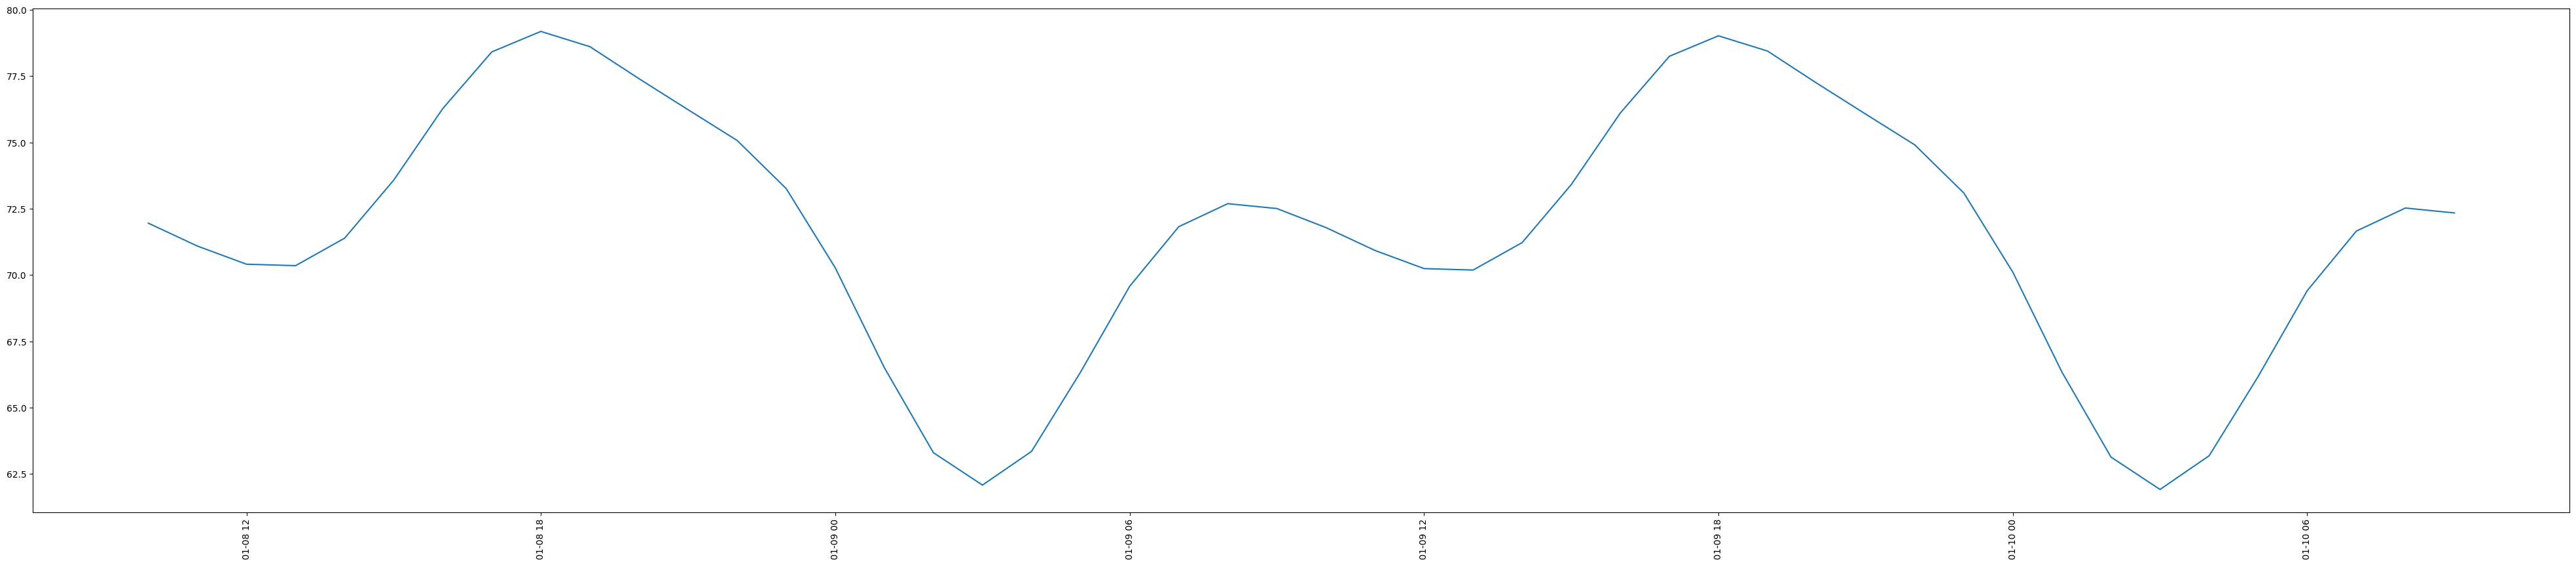

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
plt.plot(df['Time'], df['Energy'])
plt.xticks(rotation=90)
plt.show()